In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd 


df=pd.read_csv('/kaggle/input/trainingfile/train.csv')


In [4]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [5]:
import pandas as pd 


df1=pd.read_csv('/kaggle/input/testing/test.csv')


In [6]:
df1.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class Index  7600 non-null   int64 
 1   Title        7600 non-null   object
 2   Description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.3+ KB


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB
None


In [8]:
print(df.describe())

         Class Index
count  120000.000000
mean        2.500000
std         1.118039
min         1.000000
25%         1.750000
50%         2.500000
75%         3.250000
max         4.000000


In [15]:
print(df.isnull().sum())



0

In [16]:
print(df.duplicated().sum())

0


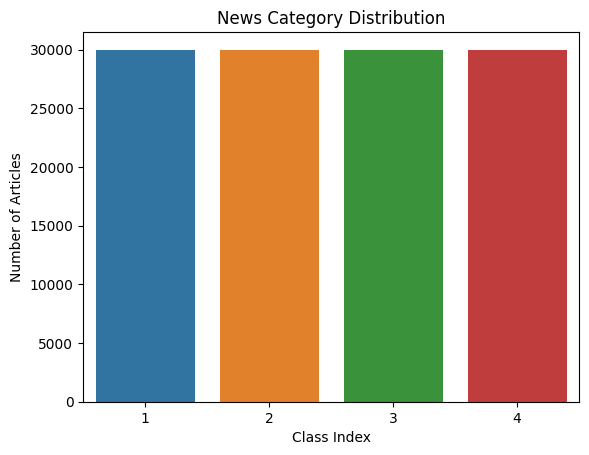

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into df
sns.countplot(data=df, x='Class Index')
plt.title('News Category Distribution')
plt.xlabel('Class Index')
plt.ylabel('Number of Articles')
plt.show()


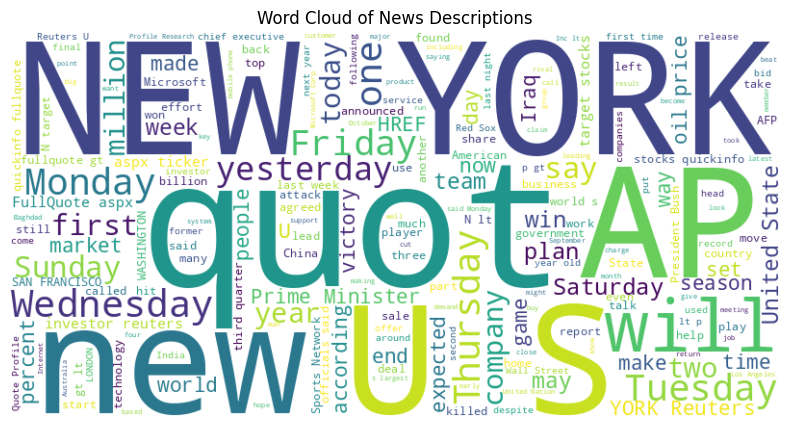

In [11]:
from wordcloud import WordCloud

text = " ".join(df['Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of News Descriptions")
plt.show()


<Axes: xlabel='Class Index'>

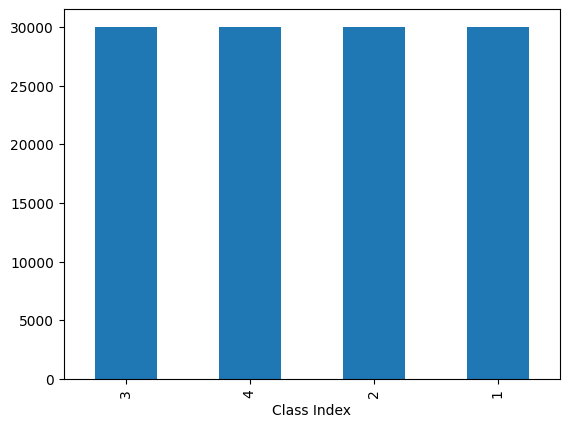

In [13]:
df['Class Index'].value_counts().plot(kind='bar')  # if you have mapped class index to category names


In [17]:
df['title_length'] = df['Title'].apply(lambda x: len(x.split()))
df['description_length'] = df['Description'].apply(lambda x: len(x.split()))
df.head()

,Class Index,Title,Description,title_length,description_length
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",9,12
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,6,30
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,7,29
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,9,27
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",13,24


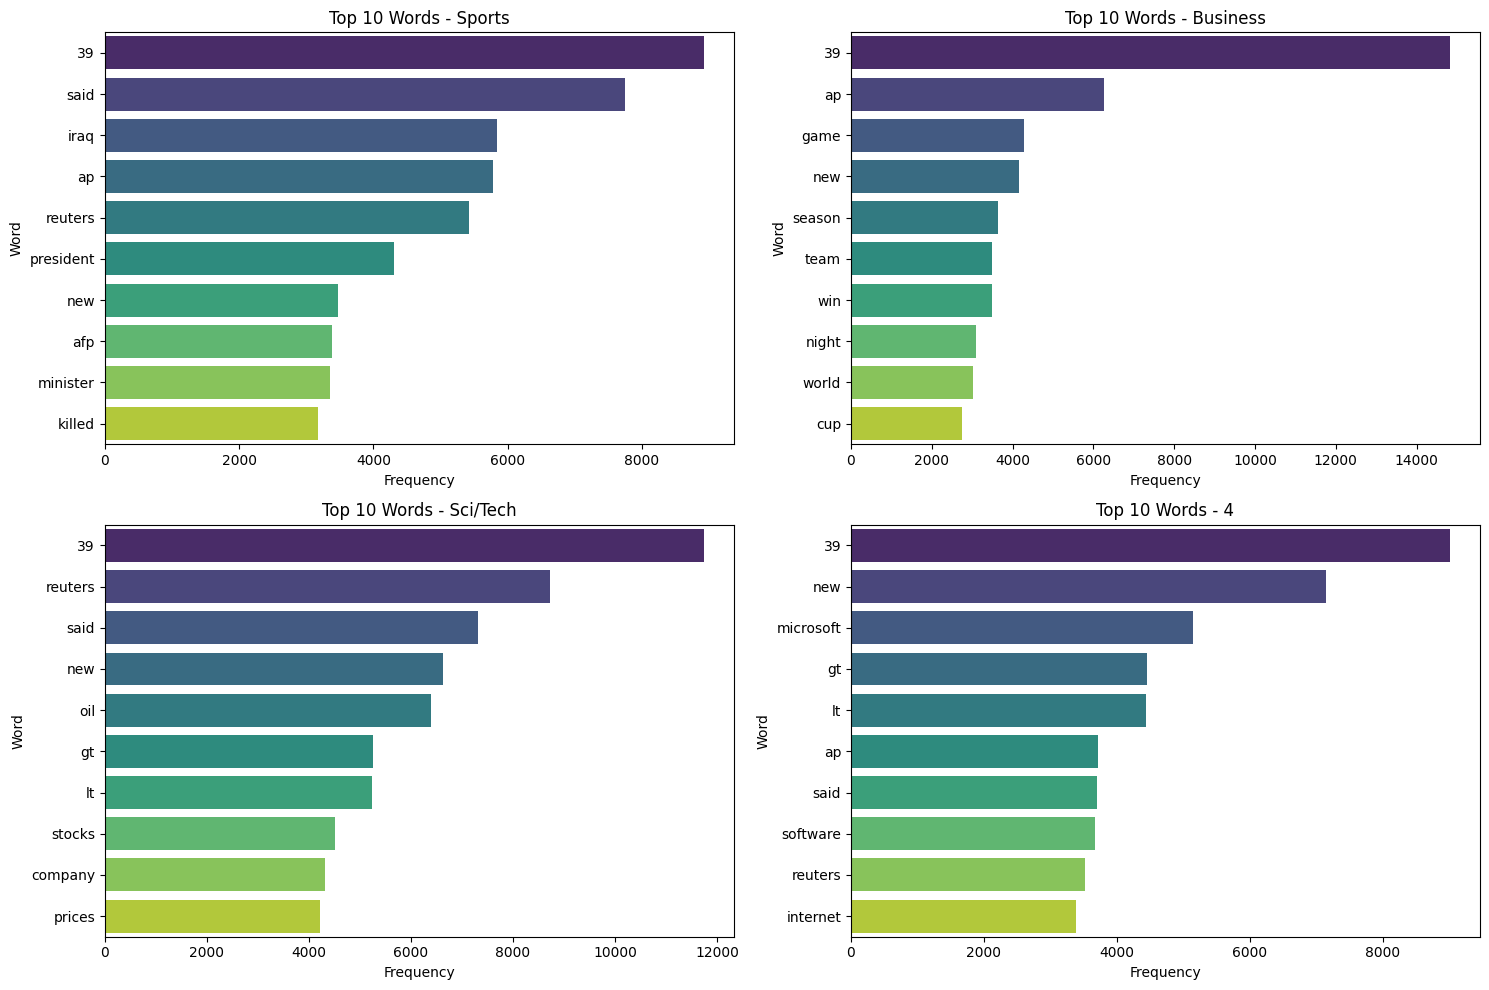

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/kaggle/input/trainingfile/train.csv")  # Replace with your file path
df['Text'] = df['Title'] + ' ' + df['Description']  # Combine title and description

# Set class names if you have them
class_names = {
    0: 'World',
    1: 'Sports',
    2: 'Business',
    3: 'Sci/Tech'
}

# Set number of top words to show
TOP_N = 10

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Analyze each class
for class_idx, ax in zip(sorted(df['Class Index'].unique()), axes):
    # Filter rows for the current class
    class_df = df[df['Class Index'] == class_idx]

    # Vectorize text
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(class_df['Text'])

    # Sum word counts
    word_counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    word_freq = pd.DataFrame({'word': vocab, 'count': word_counts})
    top_words = word_freq.sort_values(by='count', ascending=False).head(TOP_N)

    # Plot
    sns.barplot(x='count', y='word', data=top_words, ax=ax, palette='viridis')
    ax.set_title(f"Top {TOP_N} Words - {class_names.get(class_idx, class_idx)}")
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Word")

plt.tight_layout()
plt.show()


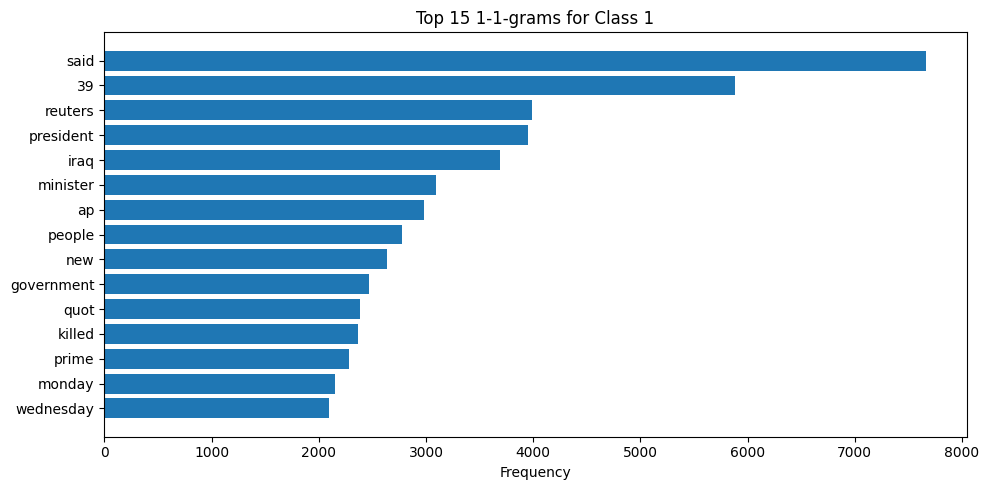

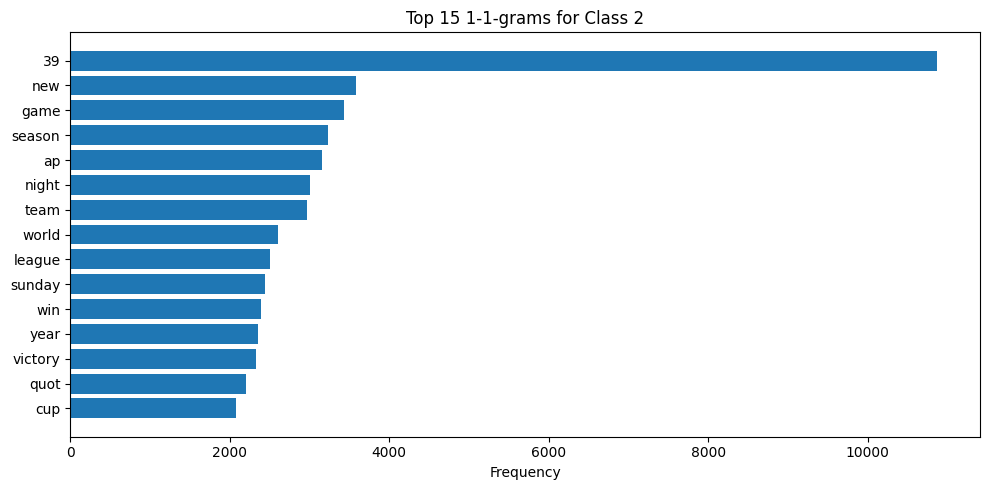

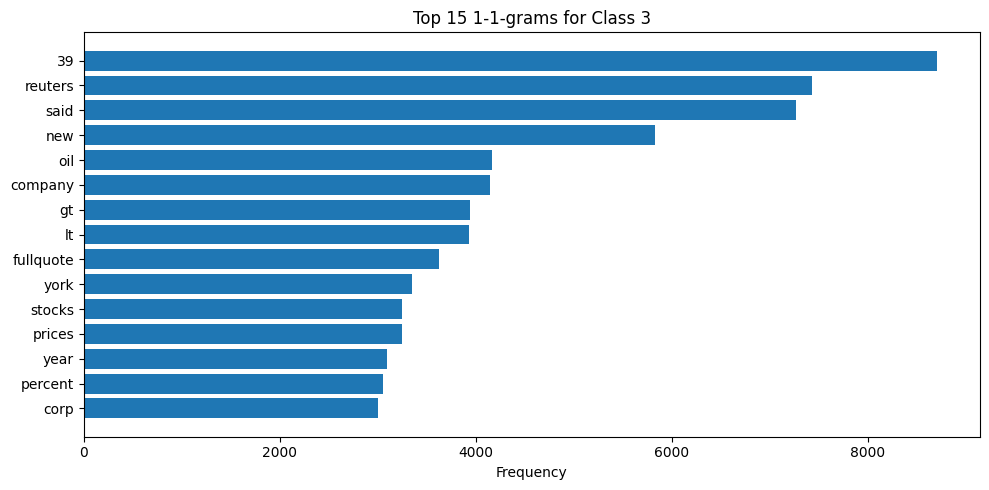

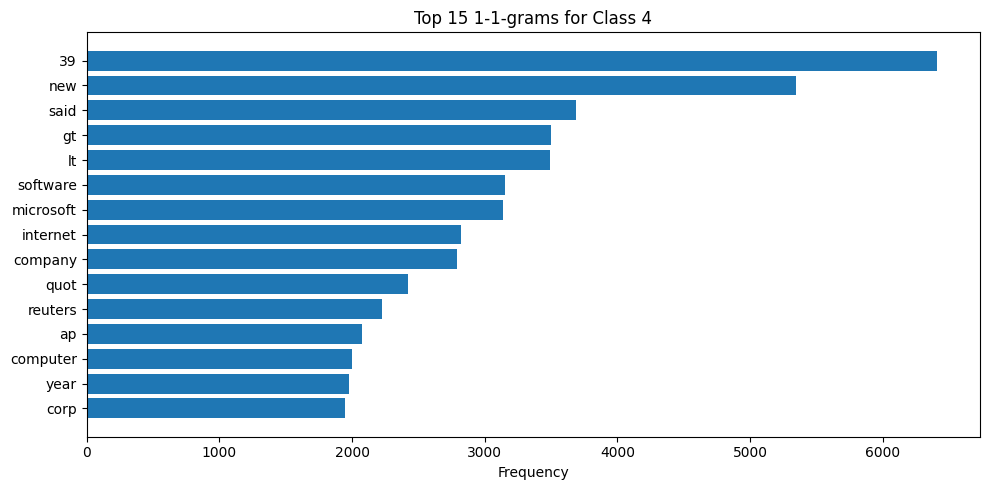

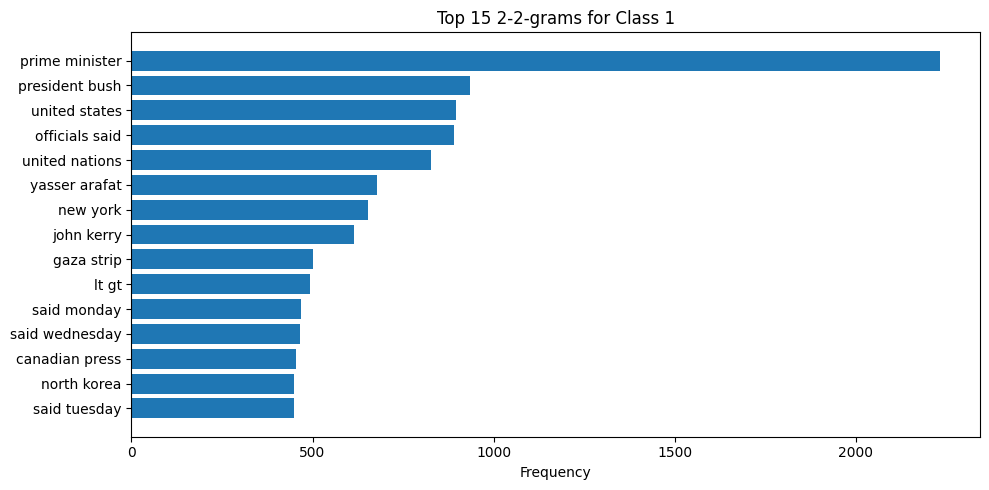

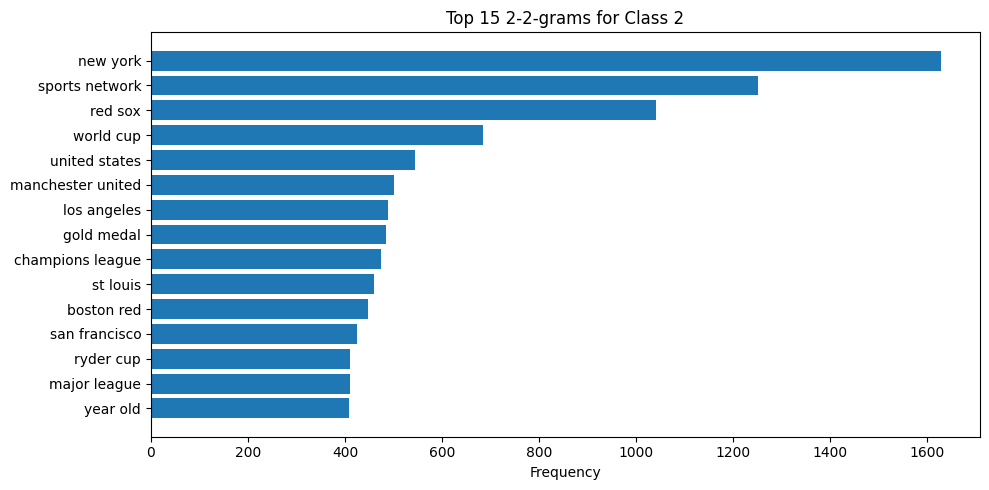

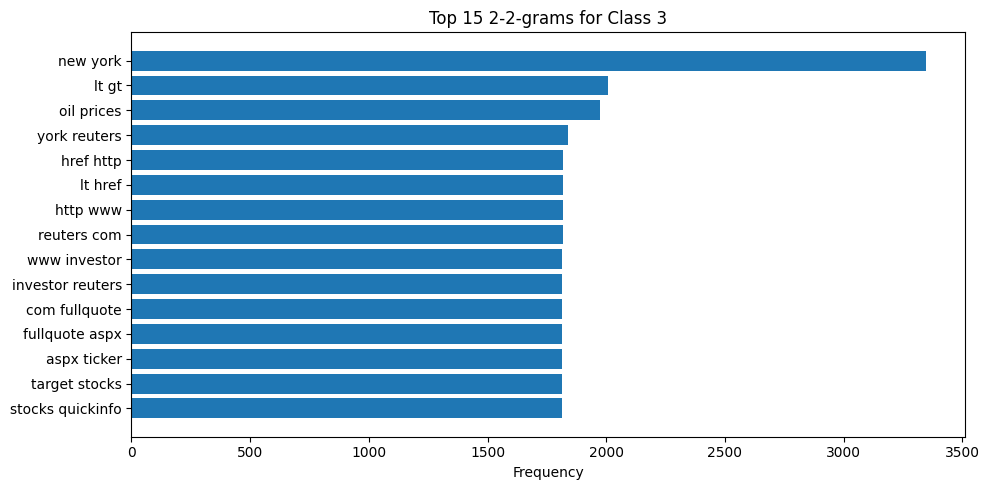

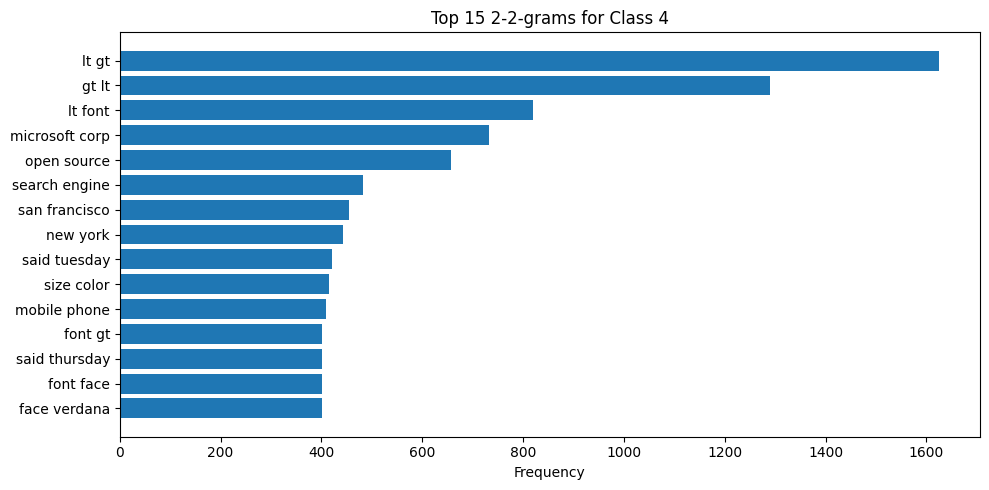

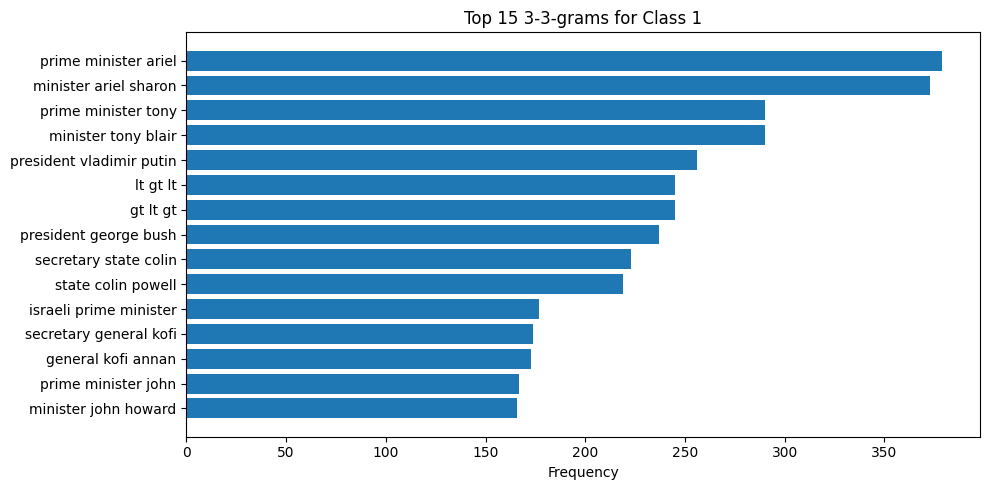

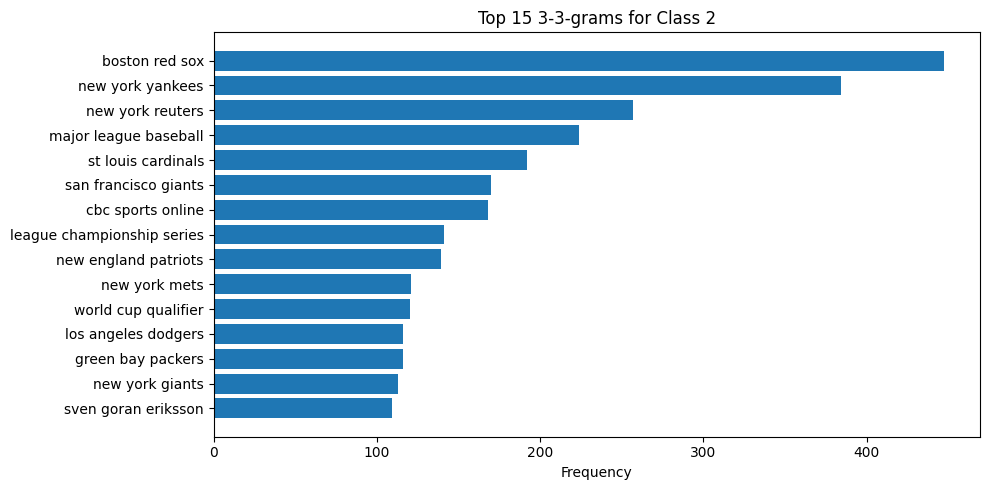

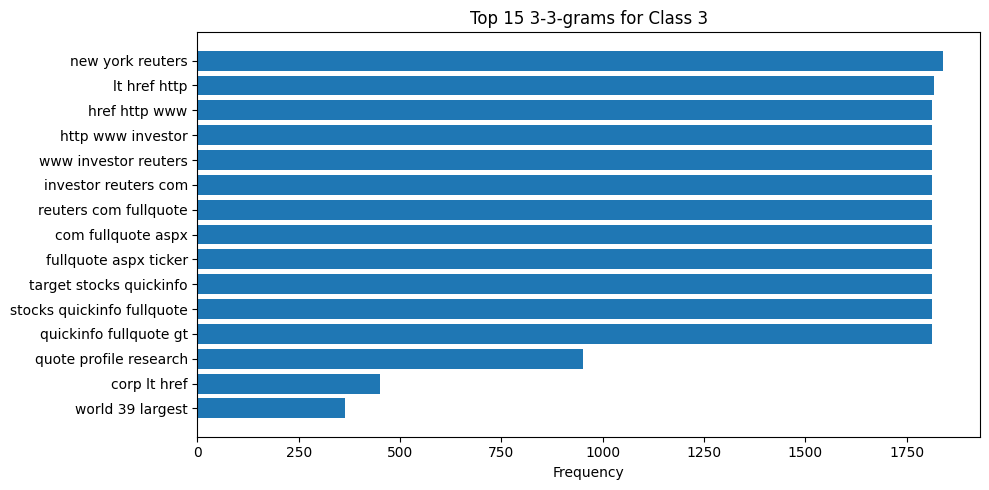

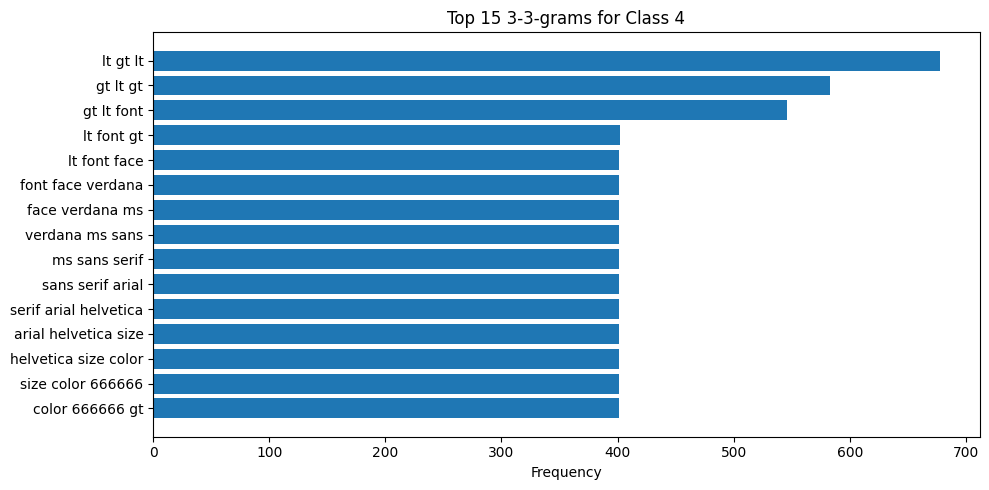

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have a DataFrame `df` with columns: 'class_index', 'description'
# Replace 'description' with 'title' if needed

def plot_top_ngrams_by_class(df, class_col, text_col, n=20, ngram_range=(1,1), class_names=None):
    for cls in sorted(df[class_col].unique()):
        class_df = df[df[class_col] == cls]
        vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english', max_features=10000)
        X = vectorizer.fit_transform(class_df[text_col])
        sum_words = X.sum(axis=0)
        word_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:n]

        # Plotting
        words = [w for w, _ in word_freq]
        freqs = [f for _, f in word_freq]

        plt.figure(figsize=(10, 5))
        plt.barh(words[::-1], freqs[::-1])
        plt.xlabel("Frequency")
        plt.title(f"Top {n} {'-'.join([str(i) for i in ngram_range])}-grams for Class {cls if not class_names else class_names[cls]}")
        plt.tight_layout()
        plt.show()

# Unigrams
plot_top_ngrams_by_class(df, class_col='Class Index', text_col='Description', n=15, ngram_range=(1, 1))

# Bigrams
plot_top_ngrams_by_class(df, class_col='Class Index', text_col='Description', n=15, ngram_range=(2, 2))

# Trigrams
plot_top_ngrams_by_class(df, class_col='Class Index', text_col='Description', n=15, ngram_range=(3, 3))


In [1]:
# train.py
from torch.optim import AdamW
from transformers import BertForSequenceClassification, BertTokenizer
import torch
from tqdm import tqdm
from etl import preprocess_data, get_dataloaders

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.backends.cudnn.benchmark = True
print("Training on device:", device)

def train():
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    df = preprocess_data("/kaggle/input/trainingfile/train.csv")

    train_loader, val_loader = get_dataloaders(df, tokenizer)

    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=4)
    model.to(device)
    optimizer = AdamW(model.parameters(), lr=2e-5)

    for epoch in range(3):
        model.train()
        total_loss = 0
        for batch in tqdm(train_loader):
            input_ids, attention_mask, labels = [x.to(device) for x in batch]
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1} Loss: {total_loss:.4f}")

    model.save_pretrained("model/saved_model/")
    tokenizer.save_pretrained("model/saved_model/")

if __name__ == "__main__":
    train()


2025-08-05 07:19:00.767728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754378340.931090      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754378340.977936      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


ModuleNotFoundError: No module named 'etl'